In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# Waveforms from Siemens IDEA Simulation
Load in textfile of diffusion lobes that were generated in IDEA simulation environment (Siemens). Plot moments gradient, noting the maximum gradient amplitude

In [11]:
# Load in MatFile of simluated waveform: 
# cardiac = cardiac waveforms, neuro = neuro waveforms 
# 1 = M_1+M_2, 2 = M_1, 3 = M0 [reverse order of moment nulling]
from scipy.io import loadmat

file = 'SimulationProtocol_neuro_3.mat'
savename = file.split('.txt')[0] + '.svg'
savedict = file.split('.txt')[0] + '.mat'

dictionary = loadmat(file)
gradient = np.squeeze(dictionary['Diff_Grad'])
dt = dictionary['dt']

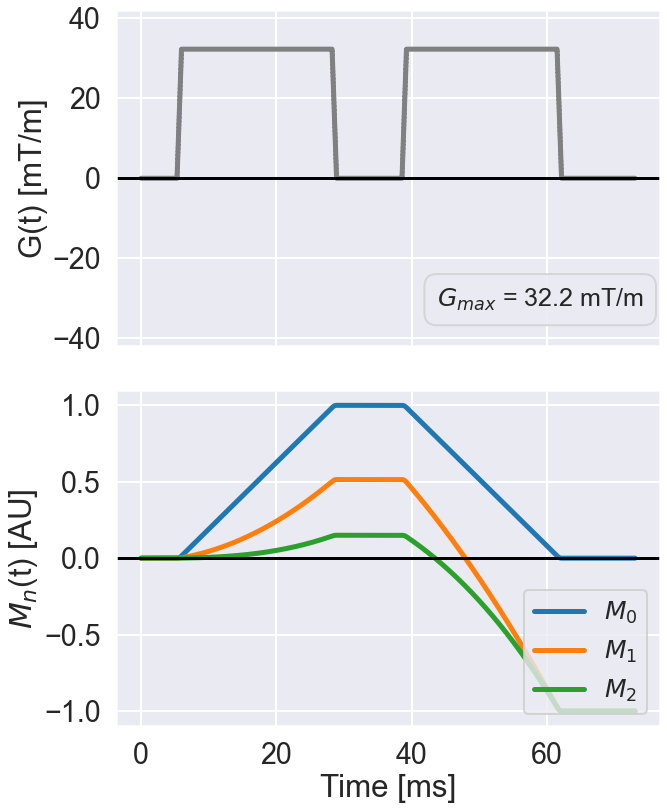

In [12]:
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
sns.set_style("darkgrid")

def plot_moments(G,  dt):
    # Get the color of the legend background
    background_color = sns.utils.get_color_cycle()[0]

    TE = G.size*dt*1e3 
    tINV = int(np.floor(TE/dt/1.0e3/2.0))
    GAMMA   = 42.58e3; 
    INV = np.ones(G.size)
    INV[tINV:] = -1
    Nm = 5
    tvec = np.arange(G.size)*dt * 1e3
    tMat = np.zeros((Nm, G.size))
    for mm in range(Nm):
        tMat[mm] = tvec**mm

    moments = np.abs(GAMMA*dt*tMat@(G*INV))
    mm = GAMMA*dt*tMat * (G*INV)[np.newaxis,:]

    maxG = np.max(abs(G))
    maxSR = np.max(np.abs(np.diff(G)/dt))

    fig, axs = plt.subplots(2, 1, figsize=(10, 12),sharex = True)
    mmt = np.cumsum(mm[0])
    axs[1].plot(np.squeeze(tvec),mmt / np.abs(mmt).max(), linewidth=5, label='$M_0$')
    mmt = np.cumsum(mm[1])
    axs[1].plot(np.squeeze(tvec),mmt / np.abs(mmt).max(), linewidth=5, label='$M_1$')
    mmt = np.cumsum(mm[2])
    axs[1].plot(np.squeeze(tvec),mmt / np.abs(mmt).max(), linewidth=5, label='$M_2$')
    
    # Plot gradient waveform
    axs[0].plot(np.squeeze(tvec),G, linestyle='-', linewidth =5, label='Gradient', color='gray')

    legend = axs[1].legend(['$M_0$', '$M_1$', '$M_1+M_2$'], loc='lower right')
    background_color = legend.get_frame().get_facecolor()


    axs[0].text(0.97, 0.1, '$G_{max}$ '+ f'= {maxG:.1f} mT/m',size = 25,
            horizontalalignment='right', verticalalignment='bottom', transform=axs[0].transAxes,bbox=dict(facecolor=background_color, alpha=0.9, edgecolor='lightgray', boxstyle='round,pad=0.5'))

    for ii in range(2):
        axs[ii].axhline(0, color='k')
    axs[1].set_xlabel('Time [ms]')
    axs[1].set_ylabel('$M_n$(t) [AU]')
    axs[0].set_ylabel('G(t) [mT/m]')
    axs[0].set_ylim([-42,42])

    legend = axs[1].legend(['$M_0$', '$M_1$', '$M_2$'], loc='lower right',fontsize = 25)
    background_color = legend.get_frame().get_facecolor()
    
    plt.tight_layout()
    fig.savefig(savename, format='svg', bbox_inches='tight')



moments = plot_moments(np.array(gradient),dt)

